In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 🔹 Load the dataset (Karnataka)
df = pd.read_csv('Tamilnadu_Colleges.csv')  # Make sure both datasets are merged

In [3]:
# 🔹 Fill any missing values
df.fillna(0, inplace=True)

In [4]:
# 🔹 Convert categorical XFO and TLS_Version to numeric (label encoding)
df['XFO'] = df['XFO'].astype(str).astype('category').cat.codes
df['TLS_Version'] = df['TLS_Version'].astype(str).astype('category').cat.codes

In [5]:
# 🔹 Features to consider (use only header-related columns)
features = ['HSTS', 'HSTS_max_age', 'CSP', 'XCTO', 'XFO',
            'Referrer_Policy', 'Perm_Policy', 'TLS_Version',
            'Cookie_HttpOnly', 'Cookie_Secure']

X = df[features]

In [6]:
# Ensure all feature columns are numeric (0/1 or integers)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Now you can calculate the security score safely
df['Security_Score'] = X.sum(axis=1)


In [7]:
# 🔹 Label: If security score >= 4 → Secure (1), else Not Secure (0)
df['Label'] = df['Security_Score'].apply(lambda x: 1 if x >= 4 else 0)
y = df['Label']

In [9]:
# 🔹 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# 🔹 Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# 🔹 Predict
y_pred = model.predict(X_test)

In [12]:
# 🔹 Evaluate
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12



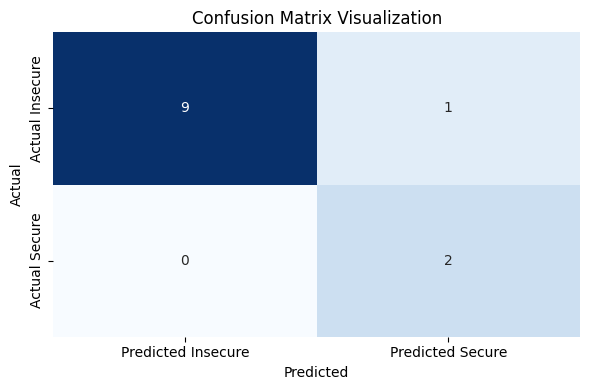

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Insecure', 'Predicted Secure'],
            yticklabels=['Actual Insecure', 'Actual Secure'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.tight_layout()
plt.show()

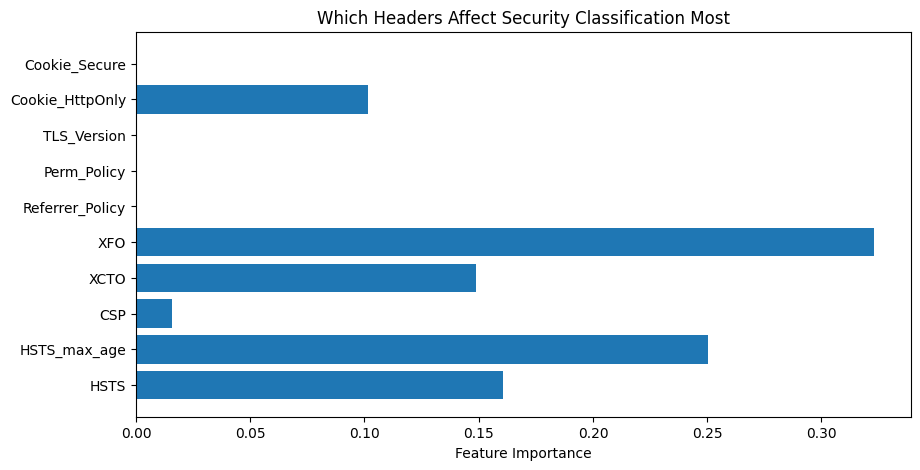

In [14]:
import matplotlib.pyplot as plt

# 🔹 Feature importance
importances = model.feature_importances_
feature_names = X.columns

# 🔹 Bar Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Headers Affect Security Classification Most")
plt.show()